# Blending Tank Simulation

by Jeffrey Kantor  (jeff at nd.edu). The latest version of this notebook is available at [https://github.com/jckantor/CBE30338](https://github.com/jckantor/CBE30338). 

### Summary

This example provides an introduction to the use of python for the simulation of a simple process modeled by a pair of ordinary differential equations. See SEMD textbook example 2.1 for more details on the process.

## Basic Simulation of the Blending Tank

\begin{align*}
\frac{dV}{dt} & = \frac{1}{\rho}(w_1 + w_2 - w)\\
\frac{dx}{dt} & = \frac{1}{\rho V}(w_1 (x_1 - x) + w_2 (x_2 - x))
\end{align*}

### Step 1. Initialize Python Workspace

Unlike Matlab, in Python it is always necessary to import the functions and libraries that you intend to use. In this case we import the complete `pylab` library, and the function `odeint` for integrating systems of differential equations from the `scipy` library.  The command `%matplotlib inline` causes graphic commands to produce results directly within the notebook output cells.

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


### Step 2. Establish Parameter Values

In [14]:
rho = 900.0  # density, kg/m**3

w1 = 500.0   # stream 1, kg/min
w2 = 200.0   # stream 2, kg/min
w =  650.0   # set outflow equal to sum of inflows

x1 = 0.4     # composition stream 1, mass fraction
x2 = 0.75    # composition stream 2, mass fraction

### Step 3. Write a function to compute the RHS's of the Differential Equations

In [15]:
def func(y,t):
    V,x = y
    dVdt = (w1 + w2 - w)/rho
    dxdt = (w1*(x1-x)+w2*(x2-x))/(rho*V)
    return [dVdt, dxdt]

### Step 4. Set the Initial Conditions, Time Grid, and Integrate

In [16]:
V = 2.0      # initial volume, cubic meters
x = 0.0      # initial composition, mass fraction

t = np.linspace(0,10.0)
y = odeint(func,[V,x],t)

### Step 5. Visualize the Solution

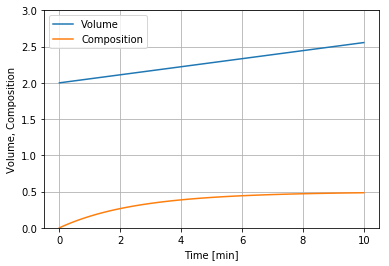

In [17]:
plt.plot(t,y)
plt.xlabel('Time [min]')
plt.ylabel('Volume, Composition')
plt.legend(['Volume','Composition'])
plt.ylim(0,3)
plt.grid()
#plt.savefig('BlendingTankStartUp.png')

## Steady State Analysis

The blending tank is a system with two state variables (volume and composition). Suppose a mechanism is put in place to force the inflow to equal the outflow, that is

$$w = w_1 + w_2$$

The mechanism could involve the installation of an overflow weir, level controller, or some other device to force a balance between the outflow and total inflows.  In this case,

$$\frac{dV}{dt} = 0$$

which means volume is at *steady state*. 

 
In that case there is just one remaining differential equation

$$\frac{dx}{dt} = \frac{1}{\rho V}( w_1(x_1 - x) + w_1(x_2 - x)) = 0$$

Solving for the steady value of $x$,

$$\bar{x} = \frac{w_1x_1 + w_2x_2}{w_1 + w_2}$$

In [19]:
w1 = 500.0   # stream 1, kg/min
w2 = 200.0   # stream 2, kg/min

x1 = 0.4     # composition stream 1, mass fraction
x2 = 0.75    # composition stream 2, mass fraction

x = (w1*x1 + w2*x2)/(w1 + w2)

print('Steady State Composition =', x)

Steady State Composition = 0.5
